In [12]:
from pathlib import Path
import sys

ROOT = Path.cwd()
if (ROOT / "src").exists() is False and (ROOT.parent / "src").exists():
    ROOT = ROOT.parent

sys.path.insert(0, str(ROOT))

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from src.viz import *

DATA part

In [14]:
dtype = {
    'store_nbr': 'category',
    'family': 'category',
    'sales': 'float32',
    'onpromotion': 'uint64',
}

store_sales = pd.read_csv(
    ROOT / "Data/train.csv",
    dtype=dtype,
    parse_dates=['date'],
    infer_datetime_format=True,
)

In [15]:
store_sales["date"] = pd.to_datetime(store_sales["date"])
store_sales = store_sales.set_index("date")
store_sales = store_sales.set_index(['store_nbr', 'family'], append=True)


In [16]:
store_sales

id        sales  \
date       store_nbr family                                             
2013-01-01 1         AUTOMOTIVE                        0     0.000000   
                     BABY CARE                         1     0.000000   
                     BEAUTY                            2     0.000000   
                     BEVERAGES                         3     0.000000   
                     BOOKS                             4     0.000000   
...                                                  ...          ...   
2017-08-15 9         POULTRY                     3000883   438.132996   
                     PREPARED FOODS              3000884   154.552994   
                     PRODUCE                     3000885  2419.729004   
                     SCHOOL AND OFFICE SUPPLIES  3000886   121.000000   
                     SEAFOOD                     3000887    16.000000   

                                                 onpromotion  
date       store_nbr family                                   
2013-01-01 1         AUTOMOTIVE                            0  
                     BABY CARE                             0  
                     BEAUTY                                0  
                     BEVERAGES                             0  
                     BOOKS                                 0  
...                                                      ...  
2017-08-15 9         POULTRY                               0  
                     PREPARED FOODS                        1  
                     PRODUCE                             148  
                     SCHOOL AND OFFICE SUPPLIES            8  
                     SEAFOOD                               0  

[3000888 rows x 3 columns]

In [17]:
average_sales = (
    store_sales.groupby(level="date")["sales"]
    .mean()
    .to_frame("sales")
)
average_sales['time'] = np.arange(len(average_sales.index))
average_sales.head(10)

,sales,time
date,,
2013-01-01,1.409438,0
2013-01-02,278.390808,1
2013-01-03,202.840195,2
2013-01-04,198.911163,3
2013-01-05,267.873260,4
2013-01-06,291.636017,5
2013-01-07,188.621109,6
2013-01-08,178.646347,7
2013-01-09,169.770370,8


# 1. Linear Regression to capture trend

Try to fit a simple linear regression to fit the trend : 
 
$$
y = \beta t + b
$$


In [18]:
X = average_sales.loc[:,['time']]
y = average_sales.loc[:,'sales']

In [19]:
lrModel = LinearRegression()
lrModel.fit(X,y)

yPred = pd.Series(lrModel.predict(X),index = X.index, name = "trend")

<Axes: title={'center': 'Linear Regression Trend'}, xlabel='Time', ylabel='Sales'>

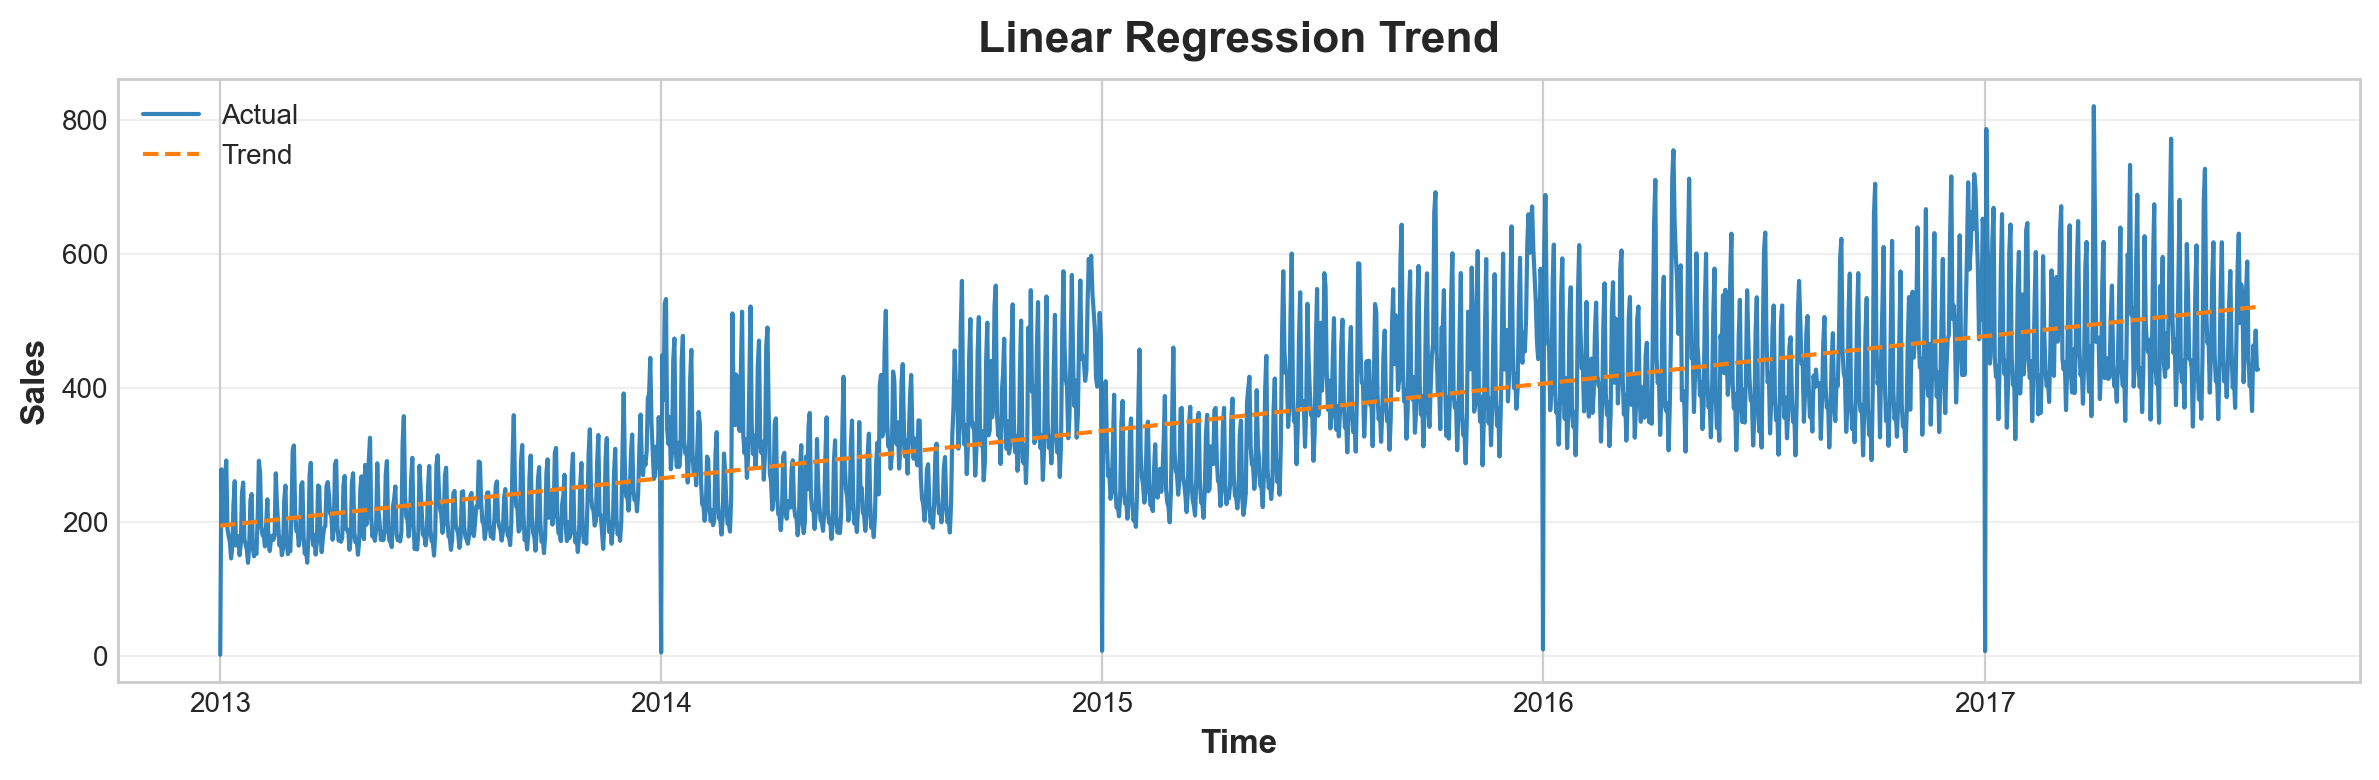

In [20]:
plot_trend_fit(y, yPred, title="Linear Regression Trend")

Fit a lag feature

In [21]:
lag_1 = average_sales['sales'].shift(1)
average_sales['lag_1'] = lag_1

In [22]:
X = average_sales.loc[:,['lag_1']].dropna()
y = average_sales.loc[:,'sales']

y, X = y.align(X,join='inner')

In [23]:
lrModel.fit(X,y)
y_pred = pd.Series(lrModel.predict(X),index = X.index)


We could tell that maybe there is some weekly pattern.

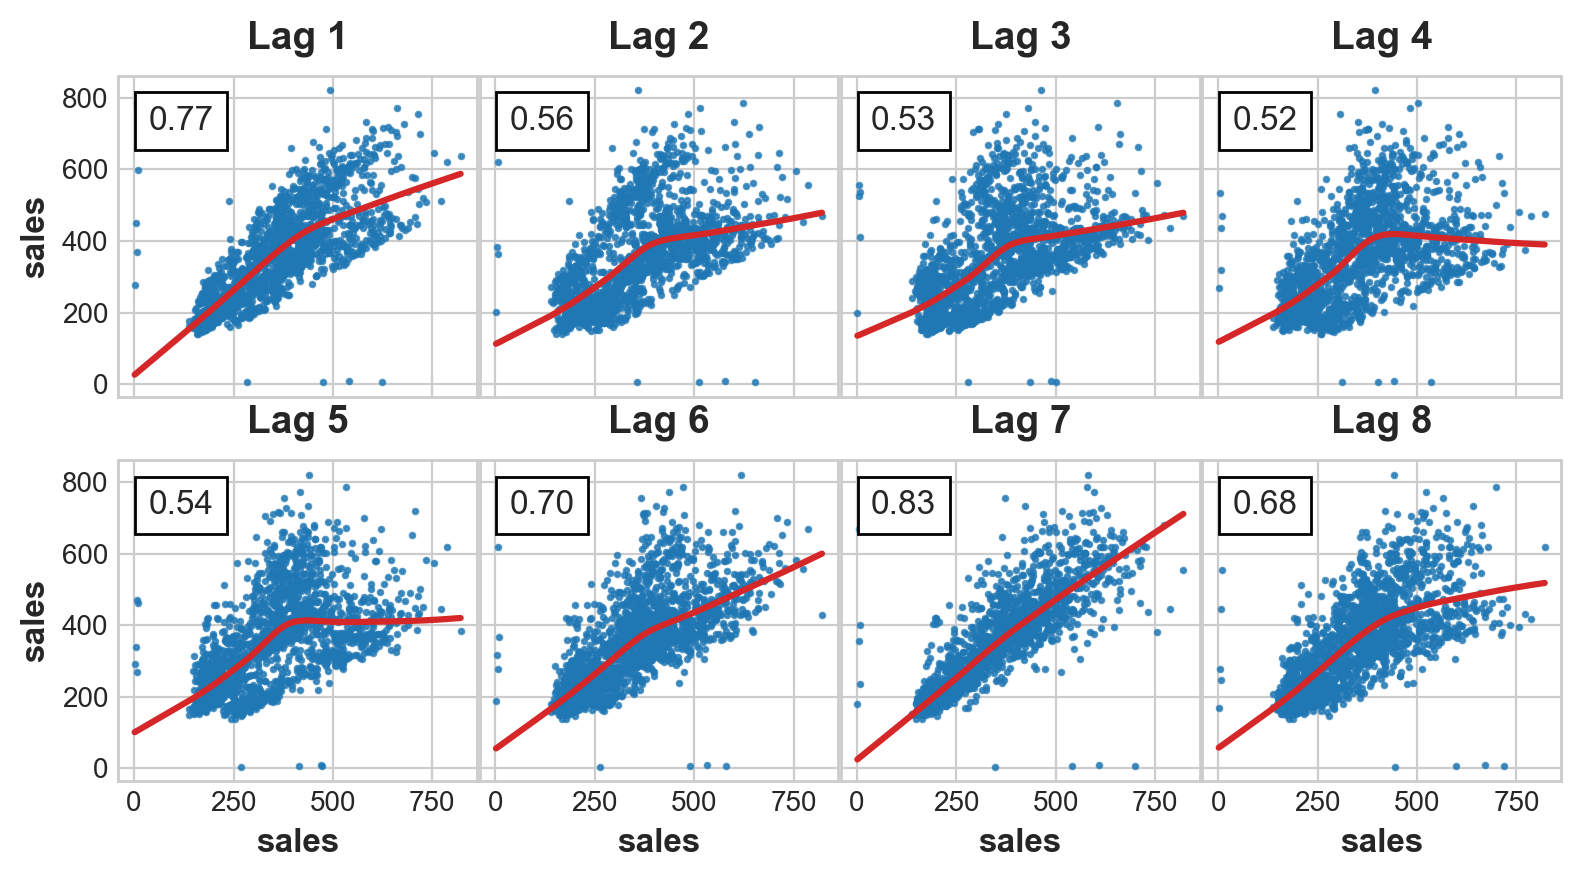

In [24]:

plot_lags(average_sales['sales'],lags=8, nrows=2);